In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/teacher/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [6]:
!pip3 install matplotlib

    100% |████████████████████████████████| 12.6MB 91kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/cf/f5/af2b09c957ace60dcfac112b669c45c8c97e32f94aa8b56da4c6d1682825/python_dateutil-2.7.3-py2.py3-none-any.whl
    100% |████████████████████████████████| 61kB 194kB/s ta 0:00:01
    100% |████████████████████████████████| 512kB 247kB/s ta 0:00:01
    100% |████████████████████████████████| 952kB 203kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/43/17/cd9fa14492dbef2aaf22622db79dba087c10f125473e730cda2f2019c40b/numpy-1.14.5-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7f/e1/820d941153923aac1d49d7fc37e17b6e73bfbd2904959fffbad77900cf92/setuptools-39.2.0-py2.py3-none-any.whl
You are using pip version 8.1.1, however version 10.0.1 is available.
You sh

In [2]:
# Алгоритмы оптимизации
import torch.optim

In [5]:
def show_contours(objective, 
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(5,5))
    plt.contour(X, Y, res, 100)

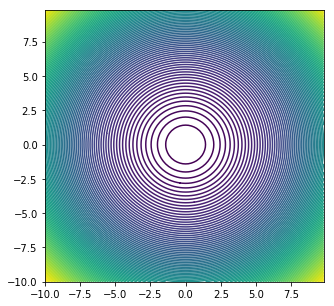

In [6]:
# Функция, которую нужно оптимизировать
def objective(inp):
    return (inp * inp).sum()

show_contours(objective)

In [9]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')
#print(history)

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-35 *
       [[ 8.0224],
        [ 8.0224]]) <- result


(2, 4000)


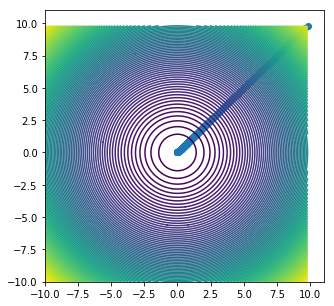

In [10]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

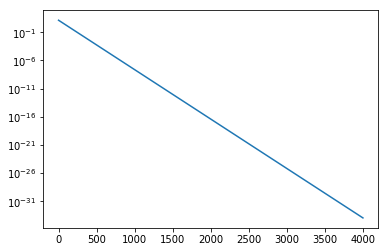

In [11]:
target = np.array([[0, 0]]).T
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plt.semilogy(error_hist);

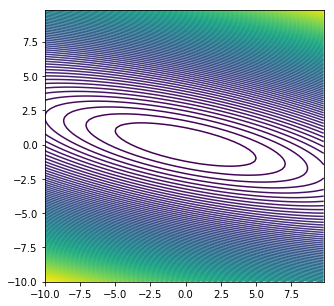

In [13]:
# Функция, которую нужно оптимизировать
def objective(inp):
#     print(inp.transpose(0, 1).shape)
    gramma = np.array([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0) @ (gramma @ inp)).sum()
    return res

show_contours(objective)

In [15]:
# Функция, которую нужно оптимизировать
def objective(inp):
    gramma = torch.tensor([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0).mm(gramma.mm(inp))).sum()
    return res

In [18]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')
print(history)

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-20 *
       [[ 5.8063],
        [-1.2322]]) <- result
[array([[9.4      ],
       [7.6000004]], dtype=float32), array([[8.908    ],
       [5.7040005]], dtype=float32), array([[8.50168  ],
       [4.2068806]], dtype=float32), array([[8.163372 ],
       [3.0254374]], dtype=float32), array([[7.879087],
       [2.093815]], dtype=float32), array([[7.6377525],
       [1.3598886]], dtype=float32), array([[7.430602 ],
       [0.7824008]], dtype=float32), array([[7.250694  ],
       [0.32869658]], dtype=float32), array([[ 7.092532  ],
       [-0.02707046]], dtype=float32), array([[ 6.951764  ],
       [-0.30535766]], dtype=float32), array([[ 6.824943 ],
       [-0.5223567]], dtype=float32), array([[ 6.7093387 ],
       [-0.69088304]], dtype=float32), array([[ 6.602787  ],
       [-0.82107997]], dtype=float32), array([[ 6.5035744 ],
       [-0.92097545]], dtype=float32), array([[ 6.4103417],
       [-0.9969233]], dtype=float32), ar

In [19]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

(2, 4000)


AttributeError: 'numpy.ndarray' object has no attribute 'mm'

# Задача 1
Решить задачу оптимизации objective, указанного выше несколькими различными способами: 

1) SGD 

2) SGD с моментом

3) Adam

4) RProp

Какой метод обеспечивает быстрейшее схождение к решению? Обсудить результат (делать графики сходимости).

# Задача 2
Решить задачу оптимизации невыпуклой функции $f(x) = 10\sin x \sin y  + x^2 + y^2$, стартуя из точки $x_0 = 10.0, y_0 = 10.0$ всеми подходами, указанными выше.
Какой из методов решает задачу лучше всего и быстрее? Зависит ли решение от начального приближения? Обсудить, почему.